# **Visualización**
# AE03. Matplotlib BoxPlots

En esta clase vamos a continuar el proceso de graficar utilizando matplotlib, principalmente: 

- El manejo de los diagramas de cajas y bigotes (Boxplots)
- Trabajar con subgráficos 
- Graficar con la orientación a objetos de matplotlib
- Calculo de estadísticas con pandas
- Manejo de anotaciones y uso de los colores con matplotlib

Comenzamos importando las librerías que vamos a utilizar:


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Para hacer las visualizaciones, utilizaremos el set de datos de las flores de Iris.

In [3]:
iris_path = "/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD03.csv"
iris_df = pd.read_csv(iris_path)
iris_df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
12,13,4.8,3.0,1.4,0.1,Iris-setosa
82,83,5.8,2.7,3.9,1.2,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
70,71,5.9,3.2,4.8,1.8,Iris-versicolor
25,26,5.0,3.0,1.6,0.2,Iris-setosa


## <font color='blue'>Diagramas de Caja y Bigotes (Box Plots)</font>

El diagrama de Caja y Bigotes es una representación univariada de los datos, utilizando múltiples componentes para poder mostrar la variabilidad y asimetría de los datos. El componente principal corresponde a la caja, compuesta por un rectángulo en el cual los limites corresponden a el primer cuartil y tercer cuartil. Adentro de dicho rectángulo se presenta una línea la cual corresponde a la mediana. El otro componente corresponde a los bigotes, los cuales se extienden hasta una distancia de $1.5 \times IQR$, donde $IQR$ corresponde al rango intercuartil y se calcula: $IQR=Q_3 - Q_1$. Finalmente, cualquier valor que supere la distancia de los bigotes, corresponden a nuestros datos atípicos (outliers), los cuales se marcan como puntos después de los bigotes.

Si nosotros quisiésemos graficar manualmente un diagrama de caja y bigote, deberíamos calcular cada elemento mencionado anteriormente para poder dibujarlo en papel y lápiz. Una de las grandes ventajas de utilizar matplotlib, es que cada uno de estos valores los calcula internamente y luego los utiliza para poder graficar cada elemento. Para esto utilizamos el método `plt.boxplot`, donde la sintaxis es la siguiente:

```python
plt.boxplot(x, *args)
```

donde `x` puede ser un arreglo unidimensional, o $n$-dimensional (donde se generarán $n$ cajas). 

Un ejemplo de esto utilizando el set de datos de Iris, obtendremos el Box plot de la variable `SepalLengthCm`:


{'boxes': [<matplotlib.lines.Line2D at 0x7fc8983d3910>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc8983dd9d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc8983e4a10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc8983e44d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc8983d3f10>,
  <matplotlib.lines.Line2D at 0x7fc8983dd490>]}

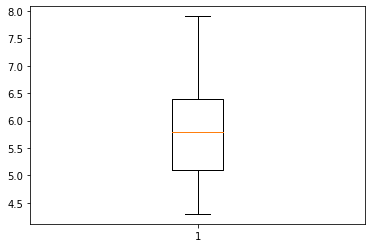

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'])

A primera vista podemos ver que la mayoría de los elementos están presentes. Un punto importante a notar sobre como grafica `matplotlib` se puede ver en la respuesta a la ejecución del código sin utilizar en la última línea el método `plt.show()`. En este caso, el método de `boxplot` nos retorna un diccionario con todos los objetos artistas para cada elemento pintado (esto es útil si quisiésemos modificar específicamente un artista en específico). 

Otro punto importante es la asimetría presente en los bigotes presentes en el ejemplo anterior. Por defecto `matplotlib` al calcular el rango intecuartil revisa los valores máximos y mínimos presentes en los datos a graficar. Si $(Q_3 + 1.5 IQR) > max(X)$ o $(Q_1 - 1.5 IQR) < min(X)$, lo que realizará matplotlib es cortar los bigotes en los valores máximos y mínimos.


Viendo los argumentos de boxplot, una de las primeras modificaciones es que podemos agregar la visualización de la media, para esto utilizamos el parámetro `showmeans`, el cual por defecto viene con valor `False`. En este caso, cambiando dicho valor a `True` mostrara la media como un punto dentro de la caja.

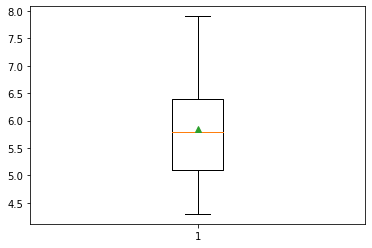

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'], showmeans=True)
plt.show()

Para mantener consistencia con el uso de líneas dentro de nuestro boxplot, podemos utilizar el parámetro `meanline` para especificar el tipo de marcador de línea a utilizar.

A modo de ejemplo, la línea de la media se mostrará en color verde:


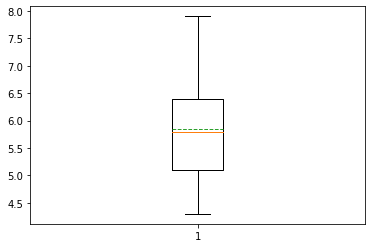

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'],showmeans=True, meanline='-')
plt.show()

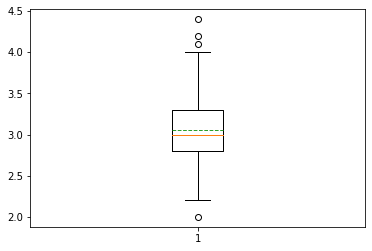

In [ ]:
plt.boxplot(iris_df['SepalWidthCm'],showmeans=True, meanline='-')
plt.show()

Utilizando como ejemplo un arreglo bidimensional, graficaremos cada caja y bigote por separado para cada variable. 

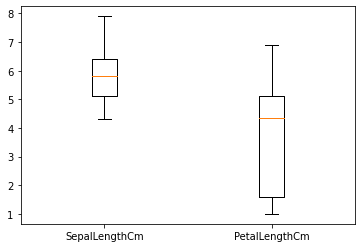

In [ ]:
columns_to_plot = [iris_df['SepalLengthCm'],iris_df['PetalLengthCm']]
plt.boxplot(columns_to_plot)

plt.xticks([1,2], ['SepalLengthCm','PetalLengthCm'])
plt.show()

**¿Que pasaría si graficáramos utilizando dos sentencias de boxplot como se muestran a continuación?:**

```python
plt.boxplot(iris_df['SepalLengthCm'])
plt.boxplot(iris_df['PetalLengthCm'])
```


{'boxes': [<matplotlib.lines.Line2D at 0x7fc892e4f450>],
 'caps': [<matplotlib.lines.Line2D at 0x7fc892e1a190>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc892ef2e50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fc892e98a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fc892e1acd0>,
  <matplotlib.lines.Line2D at 0x7fc892e1a490>]}

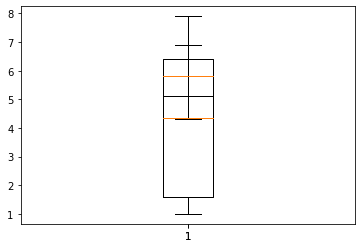

In [ ]:
plt.boxplot(iris_df['SepalLengthCm'])
plt.boxplot(iris_df['PetalLengthCm'])


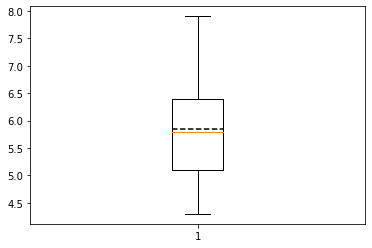

In [4]:
meanprops = dict(color="black",linewidth=1.5)
plt.boxplot(iris_df['SepalLengthCm'],showmeans=True, meanline='-',meanprops=meanprops)
plt.show()